<a href="https://colab.research.google.com/github/praveen-pethurajan/EVA6/blob/main/session7/CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import sys
import os

py_file_location = '/content/drive/My Drive/cifar/'
sys.path.append(os.path.abspath(py_file_location))

import model

In [ ]:
!pip install git+https://github.com/albumentations-team/albumentations.git


  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-4b62jlwt
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-4b62jlwt
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98151 sha256=44c3650f836dde43623f5711d9e0d7ad7c13d661176b5bc0f293ccf6596dad00
  Stored in directory: /tmp/pip-ephem-wheel-cache-p9jiwotq/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
class Cifar10SearchDataset(torchvision.datasets.CIFAR10):
    def __init__(self, root="~/data/cifar10", train=True, download=True, transform=None):
        super().__init__(root=root, train=train, download=download, transform=transform)

    def __getitem__(self, index):
        image, label = self.data[index], self.targets[index]

        if self.transform is not None:
            transformed = self.transform(image=image)
            image = transformed["image"]

        return image, label

In [ ]:
!pip install albumentations==0.4.6
import albumentations as A
from albumentations.pytorch import ToTensorV2

alb_transform = A.Compose([
    A.HorizontalFlip(p=0.4),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
    A.CoarseDropout(max_holes = 1, max_height=4, max_width=4, min_holes = 1, 
                    min_height=1, min_width=1, fill_value=[0.49139968, 0.48215841, 0.44653091]),
    A.Normalize(mean=(0.49139968, 0.48215841, 0.44653091), std=(0.24703223, 0.24348513, 0.26158784)),
    ToTensorV2(),
])


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.49139968, 0.48215841, 0.44653091), (0.229, 0.224, 0.225))])

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

Batch_size = 128

trainset = Cifar10SearchDataset(root='./data', train=True,
                                        download=True, transform=alb_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

     |████████████████████████████████| 122kB 7.5MB/s 
     |████████████████████████████████| 952kB 42.7MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp37-none-any.whl size=65175 sha256=37c6076b9250520e5941ba47b855b21d38d4186ed0f846bf6e7239a41f06fcfd
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 1.0.0
    Uninstalling albumentations-1.0.0:
      Successfully uninstalled albumentations-1.0.0
CUDA Available? True



Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


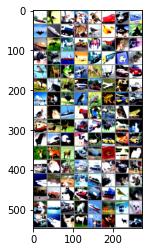

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))


In [ ]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = model.Net().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           2,080
           Conv2d-10           [-1, 32, 30, 30]           9,248
             ReLU-11           [-1, 32, 30, 30]               0
      BatchNorm2d-12           [-1, 32, 30, 30]              64
          Dropout-13           [-1, 32, 30, 30]               0
           Conv2d-14           [-1, 32,

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
minibatches = int(len(trainset)/Batch_size)
minibatches

390

In [ ]:
from torch.optim.lr_scheduler import StepLR,OneCycleLR
for epoch in range(110):  # loop over the dataset multiple times

    running_loss = 0.0
    correct = 0
    processed = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs,labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels) # CrossEntropyLoss
        loss.backward()
        optimizer.step() # SGD

        # print statistics
        running_loss += loss.item()

        pred = outputs.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(labels.view_as(pred)).sum().item()
        processed += len(inputs)

        if i == minibatches:    # print every  mini-batches
            print('[%d, %5d] loss: %.3f Acc: %.3f' %(epoch + 1, i + 1, running_loss / 2000,100*correct/processed ))
            running_loss = 0.0


[1,   391] loss: 0.378 Acc: 26.068
[2,   391] loss: 0.310 Acc: 41.208
[3,   391] loss: 0.274 Acc: 48.500
[4,   391] loss: 0.253 Acc: 52.918
[5,   391] loss: 0.239 Acc: 55.628
[6,   391] loss: 0.226 Acc: 58.418
[7,   391] loss: 0.216 Acc: 60.404
[8,   391] loss: 0.207 Acc: 61.978
[9,   391] loss: 0.199 Acc: 63.432
[10,   391] loss: 0.193 Acc: 64.988
[11,   391] loss: 0.186 Acc: 66.214
[12,   391] loss: 0.180 Acc: 67.172
[13,   391] loss: 0.175 Acc: 68.212
[14,   391] loss: 0.171 Acc: 69.122
[15,   391] loss: 0.166 Acc: 70.174
[16,   391] loss: 0.160 Acc: 71.146
[17,   391] loss: 0.158 Acc: 71.852
[18,   391] loss: 0.155 Acc: 72.042
[19,   391] loss: 0.152 Acc: 72.620
[20,   391] loss: 0.148 Acc: 73.526
[21,   391] loss: 0.147 Acc: 73.796
[22,   391] loss: 0.143 Acc: 74.294
[23,   391] loss: 0.142 Acc: 74.544
[24,   391] loss: 0.139 Acc: 75.074
[25,   391] loss: 0.136 Acc: 75.496
[26,   391] loss: 0.136 Acc: 75.588
[27,   391] loss: 0.133 Acc: 76.348
[28,   391] loss: 0.131 Acc: 76.440
[

In [ ]:

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.3f %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 82.710 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 86 %
Accuracy of   car : 92 %
Accuracy of  bird : 81 %
Accuracy of   cat : 55 %
Accuracy of  deer : 77 %
Accuracy of   dog : 66 %
Accuracy of  frog : 77 %
Accuracy of horse : 80 %
Accuracy of  ship : 96 %
Accuracy of truck : 89 %
